# What is San Francisco - Businesses EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import seaborn as sns; sns.set()

## Table of Contents

In [3]:
glob.glob('../data/Businesses/*.csv')

['../data/Businesses/Community_Development_Public_Service_Program_Activities_by_Neighborhood.csv',
 '../data/Businesses/Mobile_Food_Facility_Permit.csv',
 '../data/Businesses/sf_business_data_clean.csv',
 '../data/Businesses/Registered_Business_Locations_-_San_Francisco.csv',
 '../data/Businesses/Active_Business_Locations.csv',
 '../data/Businesses/Mobile_Food_Schedule.csv',
 '../data/Businesses/Registered_Business_Locations.csv',
 '../data/Businesses/Registered_Businesses_sorted_by_End_Date.csv']

## Registered Business Locations

#### Objective:
Because the end goal for this project is to understand urban planning and distribution of different businesses around San Francisco not all features will be relevent. This will help cut down features that may required more intensive processes to clean.


In [3]:
registered_business_locations = pd.read_csv('../data/Businesses/Registered_Business_Locations.csv', low_memory=False)

In [6]:
registered_business_locations.head(3)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0183880-01-001,183880,Chaname Miriam,Chaname Miriam,3186 23rd St,San Francisco,CA,94110.0,01/01/1989,NaN,...,8100-8139,Certain Services,False,False,NaN,NaN,9.0,Mission,NaN,"3186 23RD ST\nSan Francisco, CA 94110\n(37.753..."
1,0206570-03-999,206570,Tower Jonathan Todd,Jonathan Tower Construction,6519 Eureka Ave,El+cerrito,CA,94530.0,07/13/2011,04/19/2017,...,2300-2399,Construction,False,False,NaN,NaN,NaN,NaN,NaN,"6519 EUREKA AVE\nEL CERRITO, CA 94530\n(37.906..."
2,0302158-01-001,302158,Hanke Milo F,Milo F Hanke,100 Bush St 1675,San Francisco,CA,94104.0,01/01/1997,08/16/2016,...,5210-5239,Financial Services,False,False,NaN,NaN,3.0,Financial District/South Beach,NaN,"100 BUSH ST\nSan Francisco, CA 94104\n(37.7912..."


In [14]:
# Clean String to Datetime
registered_business_locations['Business Start Date'] = pd.to_datetime(registered_business_locations['Business Start Date'])
registered_business_locations['Business End Date'] = pd.to_datetime(registered_business_locations['Business End Date'])
registered_business_locations['Location Start Date'] = pd.to_datetime(registered_business_locations['Location Start Date'])
registered_business_locations['Location End Date'] = pd.to_datetime(registered_business_locations['Location End Date'])

In [15]:
registered_business_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227466 entries, 0 to 227465
Data columns (total 26 columns):
Location Id                            227466 non-null object
Business Account Number                227466 non-null int64
Ownership Name                         227466 non-null object
DBA Name                               227466 non-null object
Street Address                         227462 non-null object
City                                   227273 non-null object
State                                  226857 non-null object
Source Zipcode                         227292 non-null float64
Business Start Date                    227466 non-null datetime64[ns]
Business End Date                      61277 non-null datetime64[ns]
Location Start Date                    227466 non-null datetime64[ns]
Location End Date                      82877 non-null datetime64[ns]
Mail Address                           166188 non-null object
Mail City                              168654 non-nul

In [29]:
# Clean Columns
registered_business_locations.columns = [x.lower().replace('-','').replace(' ','_') for x in registered_business_locations.columns]

In [31]:
registered_business_locations[registered_business_locations['business_corridor'] != np.nan].head()

,location_id,business_account_number,ownership_name,dba_name,street_address,city,state,source_zipcode,business_start_date,business_end_date,...,naics_code,naics_code_description,parking_tax,transient_occupancy_tax,lic_code,lic_code_description,supervisor_district,neighborhoods__analysis_boundaries,business_corridor,business_location
0,0183880-01-001,183880,Chaname Miriam,Chaname Miriam,3186 23rd St,San Francisco,CA,94110.0,1989-01-01,NaT,...,8100-8139,Certain Services,False,False,NaN,NaN,9.0,Mission,NaN,"3186 23RD ST\nSan Francisco, CA 94110\n(37.753..."
1,0206570-03-999,206570,Tower Jonathan Todd,Jonathan Tower Construction,6519 Eureka Ave,El+cerrito,CA,94530.0,2011-07-13,2017-04-19,...,2300-2399,Construction,False,False,NaN,NaN,NaN,NaN,NaN,"6519 EUREKA AVE\nEL CERRITO, CA 94530\n(37.906..."
2,0302158-01-001,302158,Hanke Milo F,Milo F Hanke,100 Bush St 1675,San Francisco,CA,94104.0,1997-01-01,2016-08-16,...,5210-5239,Financial Services,False,False,NaN,NaN,3.0,Financial District/South Beach,NaN,"100 BUSH ST\nSan Francisco, CA 94104\n(37.7912..."
3,0302158-02-001,302158,Hanke Milo F,Hanke & Co,100 Bush St #1675,San+francisco,CA,94104.0,1997-01-01,2016-08-16,...,5210-5239,Financial Services,False,False,NaN,NaN,NaN,NaN,NaN,"100 BUSH ST\nSan Francisco, CA 94104\n(37.7912..."
4,0314076-01-001,314076,Moore Mary J,Mary Moore Consulting,210 Chattanooga St,San Francisco,CA,94114.0,1998-02-01,2017-05-17,...,5400-5499,"Professional, Scientific, and Technical Services",False,False,NaN,NaN,8.0,Noe Valley,NaN,"210 CHATTANOOGA ST\nSan Francisco, CA 94114\n(..."


# Distribution by Zipcode

In [60]:
sf_zipcodes = [94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110,\
               94111, 94112, 94114, 94115, 94116, 94117, 94118, 94121,\
               94122, 94123, 94124, 94127, 94129, 94130, 94131, 94132,\
               94133, 94134, 94158]

In [68]:
# Filter by SF Zipcodes
registered_business_locations = registered_business_locations[registered_business_locations['source_zipcode'].isin(sf_zipcodes)]

In [69]:
registered_business_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186826 entries, 0 to 227465
Data columns (total 26 columns):
location_id                           186826 non-null object
business_account_number               186826 non-null int64
ownership_name                        186826 non-null object
dba_name                              186826 non-null object
street_address                        186825 non-null object
city                                  186825 non-null object
state                                 186810 non-null object
source_zipcode                        186826 non-null float64
business_start_date                   186826 non-null datetime64[ns]
business_end_date                     48009 non-null datetime64[ns]
location_start_date                   186826 non-null datetime64[ns]
location_end_date                     67430 non-null datetime64[ns]
mail_address                          138817 non-null object
mail_city                             141158 non-null object
mail_

In [70]:
registered_business_locations.groupby(['source_zipcode']).count()

,location_id,business_account_number,ownership_name,dba_name,street_address,city,state,business_start_date,business_end_date,location_start_date,...,naics_code,naics_code_description,parking_tax,transient_occupancy_tax,lic_code,lic_code_description,supervisor_district,neighborhoods__analysis_boundaries,business_corridor,business_location
source_zipcode,,,,,,,,,,,,,,,,,,,,,
94102.0,9597,9597,9597,9597,9597,9597,9597,9597,2230,9597,...,5786,5786,9597,9597,854,761,6841,6841,0,7320
94103.0,13529,13529,13529,13529,13529,13529,13529,13529,3104,13529,...,8401,8401,13529,13529,1200,1134,10255,10255,81,10137
94104.0,6878,6878,6878,6878,6878,6878,6876,6878,1394,6878,...,4422,4422,6878,6878,240,238,5361,5361,0,5184
94105.0,7952,7952,7952,7952,7952,7951,7951,7952,1721,7952,...,5094,5094,7952,7952,445,443,5999,5999,0,5843
94107.0,12102,12102,12102,12102,12102,12102,12102,12102,3238,12102,...,7169,7169,12102,12102,757,748,8925,8925,1,8835
94108.0,6805,6805,6805,6805,6805,6805,6805,6805,1549,6805,...,4491,4491,6805,6805,480,430,5279,5279,94,5316
94109.0,11317,11317,11317,11317,11317,11317,11315,11317,3084,11317,...,6875,6875,11317,11317,894,814,8769,8769,29,9039
94110.0,15137,15137,15137,15137,15137,15137,15137,15137,4209,15137,...,9093,9093,15137,15137,1114,1085,11773,11773,11,11653
94111.0,8321,8321,8321,8321,8321,8321,8320,8321,1813,8321,...,5527,5527,8321,8321,441,429,4946,4946,6,6339


In [76]:
registered_business_locations.groupby(['source_zipcode','naics_code_description']).count()

location_id  \
source_zipcode naics_code_description                                          
94102.0        Accommodations                                            326   
               Administrative and Support Services                       166   
               Arts, Entertainment, and Recreation                       340   
               Certain Services                                          239   
               Construction                                              125   
               Financial Services                                         83   
               Food Services                                             696   
               Information                                               158   
               Insurance                                                   9   
               Manufacturing                                              44   
               Multiple                                                  153   
               Private Education and Health Services                     544   
               Professional, Scientific, and Technical Services         1037   
               Real Estate and Rental and Leasing Services              1042   
               Retail Trade                                              579   
               Transportation and Warehousing                            169   
               Utilities                                                   4   
               Wholesale Trade                                            72   
94103.0        Accommodations                                            405   
               Administrative and Support Services                       193   
               Arts, Entertainment, and Recreation                       502   
               Certain Services                                          279   
               Construction                                              290   
               Financial Services                                        153   
               Food Services                                             833   
               Information                                               378   
               Insurance                                                  37   
               Manufacturing                                             216   
               Multiple                                                  295   
               Private Education and Health Services                     280   
...                                                                      ...   
94134.0        Construction                                              317   
               Financial Services                                         15   
               Food Services                                             128   
               Information                                                20   
               Insurance                                                  16   
               Manufacturing                                              26   
               Multiple                                                   58   
               Private Education and Health Services                      42   
               Professional, Scientific, and Technical Services          130   
               Real Estate and Rental and Leasing Services               147   
               Retail Trade                                              166   
               Transportation and Warehousing                            228   
               Utilities                                                   4   
               Wholesale Trade                                            59   
94158.0        Accommodations                                             23   
               Administrative and Support Services                        16   
               Arts, Entertainment, and Recreation                        28   
               Certain Services                                  

# Type of Business

In [78]:
registered_business_locations.iloc[0]

location_id                                                              0183880-01-001
business_account_number                                                          183880
ownership_name                                                           Chaname Miriam
dba_name                                                                 Chaname Miriam
street_address                                                             3186 23rd St
city                                                                      San Francisco
state                                                                                CA
source_zipcode                                                                    94110
business_start_date                                                 1989-01-01 00:00:00
business_end_date                                                                   NaT
location_start_date                                                 1989-01-01 00:00:00
location_end_date               

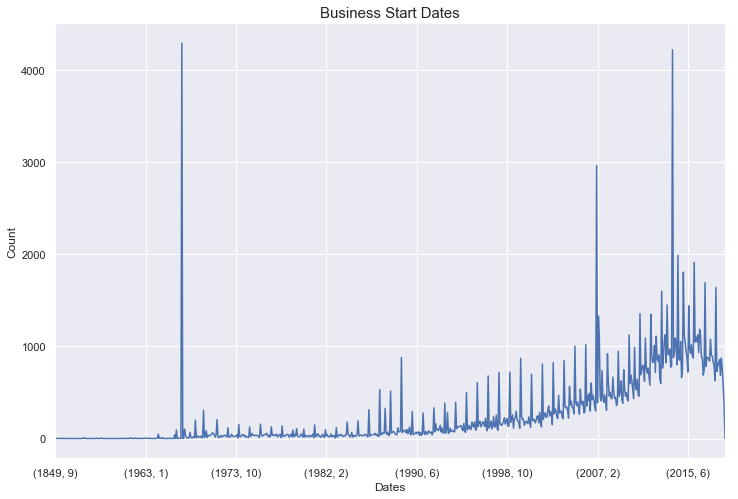

In [123]:
business_start = registered_business_locations.groupby([registered_business_locations.business_start_date.dt.year, registered_business_locations.business_start_date.dt.month]).count()[['location_id']]

_ = plt.figure(figsize=(12,8))
_ = business_start['location_id'].plot()
_ = plt.title('Business Start Dates', size=15)
_ = plt.xlabel('Dates')
_ = plt.ylabel('Count')

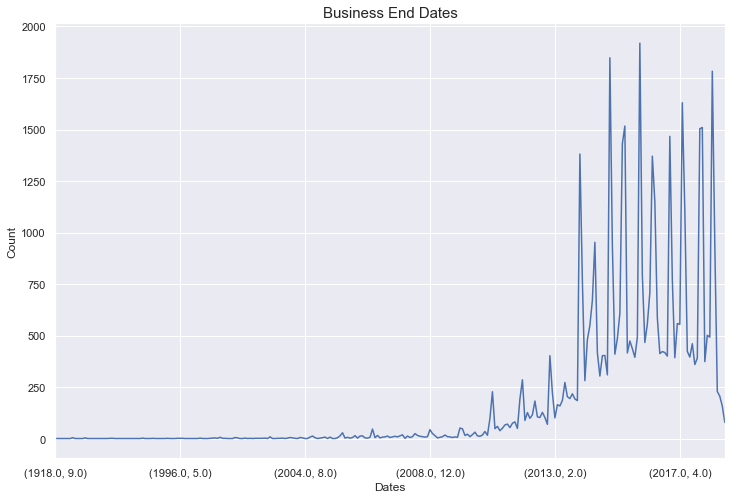

In [125]:
business_end = registered_business_locations.groupby([registered_business_locations.business_end_date.dt.year, registered_business_locations.business_end_date.dt.month]).count()[['location_id']]

# Plot Dates over Time
_ = plt.figure(figsize=(12,8))
_ = business_end['location_id'].plot()
_ = plt.title('Business End Dates', size=15)
_ = plt.xlabel('Dates')
_ = plt.ylabel('Count')

# Business Starts

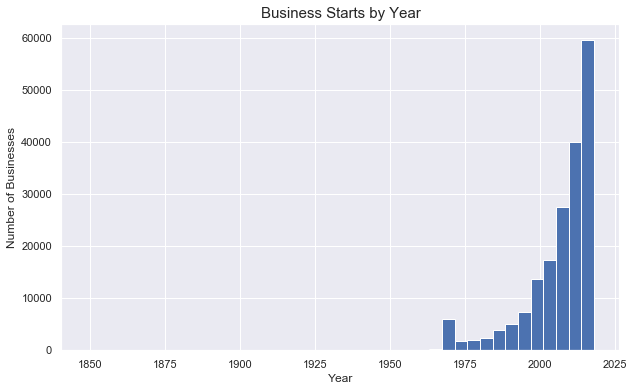

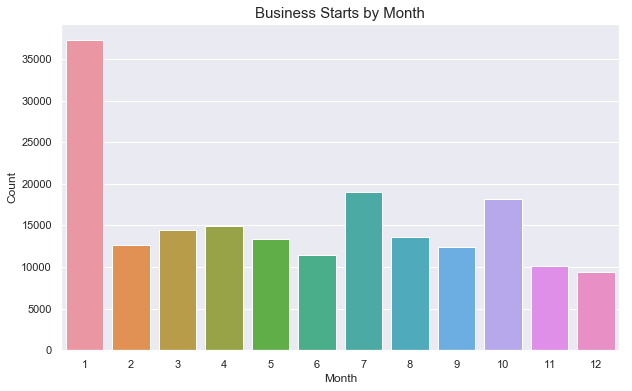

In [155]:
# Business Started by Year
_ = plt.figure(figsize=(10,6))
_ = registered_business_locations['business_start_year'].hist(bins=40)
_ = plt.title('Business Starts by Year', size=15)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Businesses')

# Business Started By Month
business_start_month = registered_business_locations.groupby([registered_business_locations.business_start_date.dt.month]).count()[['location_id']]
business_start_month = business_start_month.reset_index()
business_start_month.columns = ['month','count']

_ = plt.figure(figsize=(10,6))
_ = sns.barplot(x='month',y='count',data=business_start_month)
_ = plt.title('Business Starts by Month', size=15)
_ = plt.xlabel('Month')
_ = plt.ylabel('Count')

# Business Ends

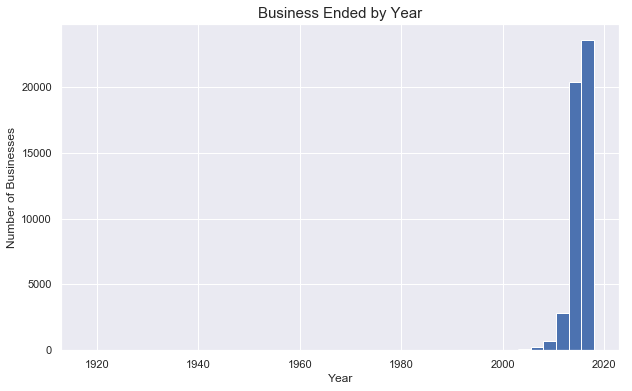

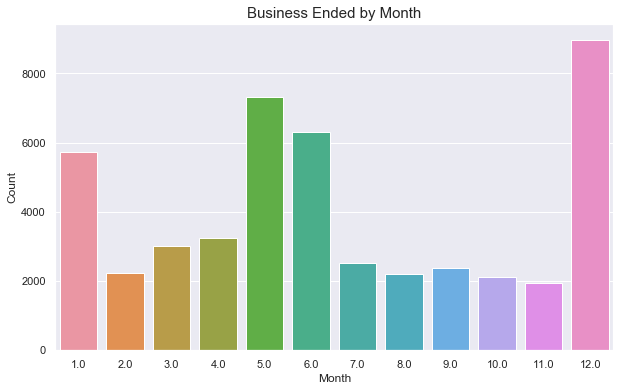

In [158]:
# Business Ended by Year
_ = plt.figure(figsize=(10,6))
_ = registered_business_locations['business_end_year'].hist(bins=40)
_ = plt.title('Business Ended by Year', size=15)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Businesses')

# Business Ended By Month
business_end_month = registered_business_locations.groupby([registered_business_locations.business_end_date.dt.month]).count()[['location_id']]
business_end_month = business_end_month.reset_index()
business_end_month.columns = ['month','count']

_ = plt.figure(figsize=(10,6))
_ = sns.barplot(x='month',y='count',data=business_end_month)
_ = plt.title('Business Ended by Month', size=15)
_ = plt.xlabel('Month')
_ = plt.ylabel('Count')

# By Category

In [162]:
# Get full dataset where business type is not null
business_by_categories = registered_business_locations[registered_business_locations['naics_code_description'].notnull()]

In [164]:
business_by_categories.iloc[0]

location_id                                                              0183880-01-001
business_account_number                                                          183880
ownership_name                                                           Chaname Miriam
dba_name                                                                 Chaname Miriam
street_address                                                             3186 23rd St
city                                                                      San Francisco
state                                                                                CA
source_zipcode                                                                    94110
business_start_date                                                 1989-01-01 00:00:00
business_end_date                                                                   NaT
location_start_date                                                 1989-01-01 00:00:00
location_end_date               

In [165]:
business_by_categories['naics_code_description'].value_counts()

Real Estate and Rental and Leasing Services         22968
Professional, Scientific, and Technical Services    20120
Retail Trade                                        11103
Food Services                                        9719
Private Education and Health Services                6851
Arts, Entertainment, and Recreation                  6317
Accommodations                                       6223
Construction                                         6130
Financial Services                                   3765
Multiple                                             3591
Certain Services                                     3532
Information                                          3297
Transportation and Warehousing                       3014
Administrative and Support Services                  2786
Wholesale Trade                                      2616
Manufacturing                                        1566
Insurance                                             621
Utilities     